## **Random Sample Imputation for Categorical Data**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
house_df = pd.read_csv('D:/Academics/AI/Data Sets/House.csv', usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [47]:
house_df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [48]:
house_df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = house_df
y = house_df['SalePrice']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [53]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
339,NaN,TA,155000,NaN,TA
1086,NaN,TA,83500,NaN,TA
279,TA,TA,192000,TA,TA
1075,Gd,TA,219500,Gd,TA
1173,Gd,NaN,200500,Gd,NaN


In [54]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\1318848343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\1318848343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


In [55]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\243603290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\243603290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


In [56]:
temp = pd.concat([X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
                  X_train['FireplaceQu_imputed'].value_counts() / len(X_train['FireplaceQu_imputed'])], axis=1)

In [57]:
temp.columns = ['Original', 'Imputed']
temp

,Original,Imputed
Gd,0.494272,0.494007
TA,0.412439,0.410959
Fa,0.040917,0.041952
Po,0.027823,0.029110
Ex,0.024550,0.023973


C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\1854357960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\1854357960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

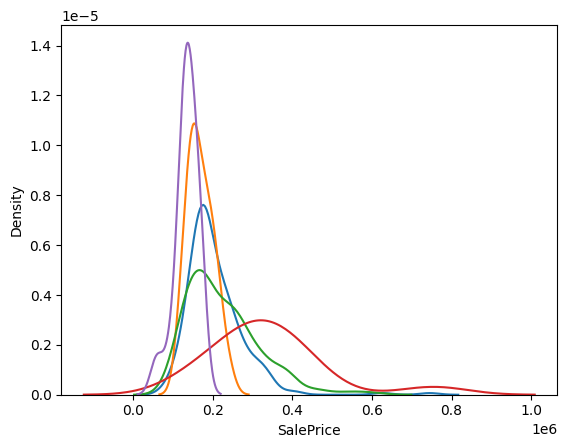

In [61]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7676\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

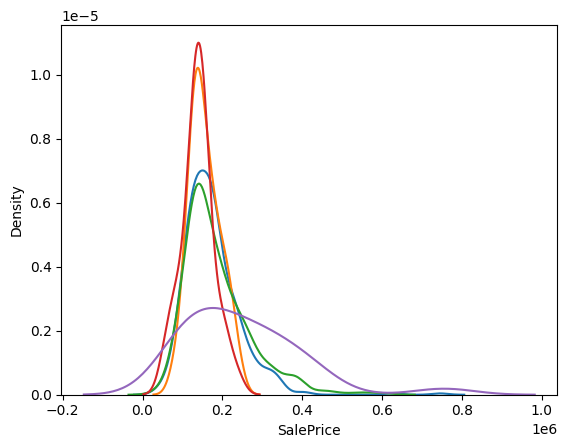

In [63]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

In [59]:
temp2 = pd.concat([X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
                  X_train['GarageQual_imputed'].value_counts() / len(X_train['GarageQual_imputed'])], axis=1)

In [60]:
temp2.columns = ['Original', 'Imputed']
temp2

,Original,Imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.001712
